<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 40px; margin: -10px -10px 20px -10px; border-radius: 0 0 15px 15px;">
<h1 style="margin: 0; font-size: 2.5em;">Introduction & Development Pipeline</h1>
<p style="margin: 10px 0 0 0; font-size: 1.2em; opacity: 0.9;">Week 1, Session 1 — Fab Futures</p>
</div>

## Contents

- [Prerequisites](#prerequisites)
- [Learning Objectives](#learning-objectives)

1. [What Can You Build?](#1-what-can-you-build) — *Start here!*
2. [Chips That Changed the World](#chips-that-changed-the-world) — *Famous examples*
3. [What is a Chip?](#2-what-is-a-chip)
4. [Types of Integrated Circuits](#3-types-of-integrated-circuits)
5. [From Transistor to System](#4-from-transistor-to-system)
6. [The Development Pipeline](#5-the-development-pipeline)
7. [Tools & Ecosystem](#6-tools--ecosystem)
8. [Process Development Kits (PDKs)](#7-process-development-kits)
9. [Low-Cost Tapeout Options](#8-low-cost-tapeout-options)
10. [Version Control for Hardware](#9-version-control-for-hardware)

---
<a id="prerequisites"></a>
## Prerequisites

This course assumes:

- **Basic programming experience** — any language; we'll teach Verilog from scratch
- **Digital logic fundamentals** — AND, OR, NOT gates; binary numbers (helpful but not required)
- **Comfort with the command line** — navigating directories, running commands
- **No prior hardware design experience required**

If you've used an Arduino or Raspberry Pi, you're well prepared. If not, that's fine too—we start from first principles.

---
<a id="learning-objectives"></a>
## Learning Objectives

By the end of this course, you will be able to:

- **Write synthesizable Verilog** for digital circuits (combinational and sequential logic, state machines)
- **Simulate and verify** designs using testbenches and waveform analysis
- **Use open-source EDA tools** (Yosys, OpenROAD, Magic) to take RTL to layout
- **Understand the chip development pipeline** from specification through fabrication
- **Read and apply PDK design rules** for a real manufacturing process (Sky130)
- **Prepare a design for tapeout** on an educational shuttle (Tiny Tapeout or similar)

You'll complete hands-on projects that could actually be fabricated on silicon.

---

In [1]:
# Setup: Import libraries for visualizations
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

# Color scheme
COLORS = {
    'primary': '#2196F3',
    'secondary': '#FF9800',
    'success': '#4CAF50',
    'danger': '#f44336',
    'dark': '#1a1a2e',
    'light': '#f5f5f5'
}

print("Setup complete.")

Setup complete.


---
<a id="1-what-can-you-build"></a>
# 1. What Can You Build?
---

Before diving into technical details, let's see what's possible. **Real people have designed real chips** that do fun, creative things—and had them manufactured on silicon.

### Silicon-Proven Examples

These projects have been fabricated and tested on actual hardware:

| Project | What It Does | Source Code |
|---------|--------------|-------------|
| **[Analog Emulation Monosynth](https://tinytapeout.com/chips/tt05/262)** | Two oscillators + filter = music on a chip | [GitHub](https://github.com/toivoh/tt05-synth) |
| **[TTRPG Dice](https://tinytapeout.com/chips/tt06/105)** | D4, D6, D8, D10, D12, D20 dice with 7-seg display | [GitHub](https://github.com/sanojn/tt06_ttrpg_dice) |
| **[Super Mario Tune](https://tinytapeout.com/chips/tt05/197)** | Plays the Mario theme on a piezo speaker | [GitHub](https://github.com/meriac/tt05-play-tune) |
| **[Simon Says](https://tinytapeout.com/chips/tt06/899)** | Classic memory game with LEDs and audio | [GitHub](https://github.com/urish/tt06-simon-game) |

Browse more at [tinytapeout.com/chips/silicon-proven](https://tinytapeout.com/chips/silicon-proven/)

---

### Example Projects to Remix or Inspire Your Own

We provide four starter projects you can **build as-is, modify, or use as inspiration** for your own design. The goal isn't to follow a recipe—it's to understand the process so you can create something uniquely yours.

<table>
<tr>
<td width="25%" align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Magic8ball.jpg/150px-Magic8ball.jpg" alt="Magic 8-ball"><br>
<b>Fortune Teller</b><br>
<em>Magic 8-ball over UART</em><br>
<a href="05_rtl_design_verification.ipynb">→ RTL & Verification</a>
</td>
<td width="25%" align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Moog_Modular_55_img1.jpg/180px-Moog_Modular_55_img1.jpg" alt="Synthesizer"><br>
<b>Pocket Synth</b><br>
<em>4-button PWM audio</em><br>
<a href="05_rtl_design_verification.ipynb">→ RTL & Verification</a>
</td>
<td width="25%" align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Sevensegment.jpg/150px-Sevensegment.jpg" alt="7-segment display"><br>
<b>Dice Roller</b><br>
<em>Digital dice with display</em><br>
<a href="06_synthesis_physical_design.ipynb">→ Synthesis & Layout</a>
</td>
<td width="25%" align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/16346-SMD_LED_-_RGB_WS2812B_Strip_of_50_-02.jpg/180px-16346-SMD_LED_-_RGB_WS2812B_Strip_of_50_-02.jpg" alt="WS2812 LEDs"><br>
<b>LED Messenger</b><br>
<em>Scrolling RGB text</em><br>
<a href="05_rtl_design_verification.ipynb">→ RTL & Verification</a>
</td>
</tr>
</table>

**Have your own idea?** Even better. These examples teach the techniques—what you build with them is up to you. Past students have created everything from game controllers to scientific instruments.

**The goal:** By the end of this course, you'll understand how to take a project from Verilog code to silicon.

---
<a id="chips-that-changed-the-world"></a>
# Chips That Changed the World
---

Custom silicon has shaped modern life. Here are a few chips worth knowing:

### Intel 4004 (1971) — The First Microprocessor

![Intel 4004](https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Intel_4004.jpg/300px-Intel_4004.jpg)

- **2,300 transistors** on a 12 mm² die
- Originally designed for a Japanese calculator
- Ran at 740 kHz — your design will run faster!
- Started the microprocessor revolution

*"The 4004 was one of the most revolutionary products in the history of mankind."* — Federico Faggin, co-designer

### MOS 6502 (1975) — The People's Processor

![MOS 6502](https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/MOS_6502AD_4585_top.jpg/220px-MOS_6502AD_4585_top.jpg)

- Sold for **$25** when competitors charged $300+
- Powered the **Apple II**, **Commodore 64**, and **NES**
- ~3,500 transistors, hand-drawn layout
- Still manufactured today for hobbyists

The 6502 democratized computing — suddenly anyone could afford a real CPU.

### Game Boy CPU (1989) — Gaming Goes Portable

![Game Boy](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Game-Boy-FL.jpg/170px-Game-Boy-FL.jpg)

- Custom Sharp LR35902 (Z80-derived)
- Ran at just **4.19 MHz** on 4 AA batteries
- **118 million** Game Boys sold
- Proved that clever design beats raw power

The Game Boy lasted 15+ hours on batteries while competitors died in 3. That's the power of good chip design.

### 555 Timer (1972) — The Chip That Does Everything

![555 Timer die](https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/Signetics_NE555N.JPG/220px-Signetics_NE555N.JPG)

- **Billions** manufactured — most popular IC ever
- Just 25 transistors in an elegant analog design
- Blinks LEDs, generates tones, debounces buttons
- Still used 50+ years later, unchanged

If you've ever built an electronics project, you've probably used a 555.

### Apple M1 (2020) — Custom Silicon Wins

![Apple M1 chip](https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Mac_Mini_M1_chip.jpg/300px-Mac_Mini_M1_chip.jpg)

- **16 billion transistors** on 5nm process
- Beat Intel at performance while using less power
- Proved that investing in custom silicon pays off
- TSMC fabrication, Apple architecture

The M1 showed that custom chips aren't just for specialized chip design companies — they're for anyone who cares about performance.

---

### What Do They Have in Common?

| Chip | Year | Transistors | Key Insight |
|------|------|-------------|-------------|
| 4004 | 1971 | 2,300 | General-purpose beats custom logic |
| 6502 | 1975 | 3,500 | Cost matters as much as speed |
| Game Boy | 1989 | ~10,000 | Power efficiency enables new products |
| 555 | 1972 | 25 | Elegant design lasts forever |
| M1 | 2020 | 16B | Vertical integration wins |

**The lesson:** Great chips aren't just about transistor counts. They solve real problems in clever ways.

Now let's learn how to design our own.

---
<a id="2-what-is-a-chip"></a>
# 2. What is a Chip?
---

An **integrated circuit (IC)** or **chip** is a set of electronic circuits on a small flat piece of semiconductor material (usually silicon).

### Why Silicon?

| Property | Why It Matters |
|----------|----------------|
| **Semiconductor** | Can be made conductive or insulating by doping |
| **Abundant** | Second most common element in Earth's crust (sand!) |
| **Stable oxide** | SiO₂ is an excellent insulator |
| **Crystalline** | Regular atomic structure enables precise manufacturing |

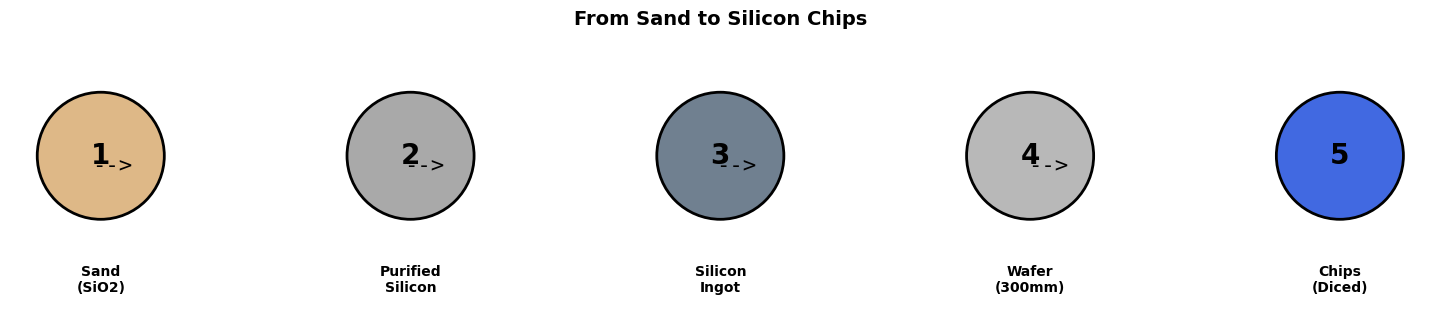

In [2]:
# Visualize: From sand to chip
fig, axes = plt.subplots(1, 5, figsize=(16, 3))

stages = [
    ('Sand\n(SiO2)', '#DEB887', '1'),
    ('Purified\nSilicon', '#A9A9A9', '2'),
    ('Silicon\nIngot', '#708090', '3'),
    ('Wafer\n(300mm)', '#B8B8B8', '4'),
    ('Chips\n(Diced)', '#4169E1', '5'),
]

for ax, (label, color, num) in zip(axes, stages):
    circle = plt.Circle((0.5, 0.5), 0.35, color=color, ec='black', linewidth=2)
    ax.add_patch(circle)
    ax.text(0.5, 0.5, num, ha='center', va='center', fontsize=20, fontweight='bold')
    ax.text(0.5, -0.1, label, ha='center', va='top', fontsize=10, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.3, 1)
    ax.set_aspect('equal')
    ax.axis('off')

# Add arrows between stages
for i in range(len(axes) - 1):
    fig.text(0.12 + i * 0.195, 0.5, '-->', fontsize=16, ha='center', va='center', family='monospace')

plt.suptitle('From Sand to Silicon Chips', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
<a id="3-types-of-integrated-circuits"></a>
# 3. Types of Integrated Circuits
---

### By Function

| Type | Examples | Characteristics |
|------|----------|----------------|
| **Microprocessors (CPUs)** | Intel Core, AMD Ryzen, Apple M-series | General-purpose computation |
| **Microcontrollers (MCUs)** | Arduino (ATmega), ESP32, STM32 | CPU + memory + peripherals on one chip |
| **Memory** | DRAM, SRAM, Flash | Data storage |
| **Analog/Mixed-Signal** | ADCs, DACs, amplifiers | Interface between analog and digital |
| **RF/Wireless** | WiFi, Bluetooth, cellular | Radio frequency communication |
| **Power Management** | Voltage regulators, battery chargers | Power conversion and distribution |
| **Sensors** | Accelerometers, temperature, image sensors | Convert physical quantities to electrical signals |

### By Design Approach

| Type | Description | Use Case |
|------|-------------|----------|
| **ASIC** | Application-Specific IC | High volume, optimized for one task |
| **FPGA** | Field-Programmable Gate Array | Prototyping, reconfigurable logic |
| **Standard Products** | Off-the-shelf ICs | General-purpose building blocks |

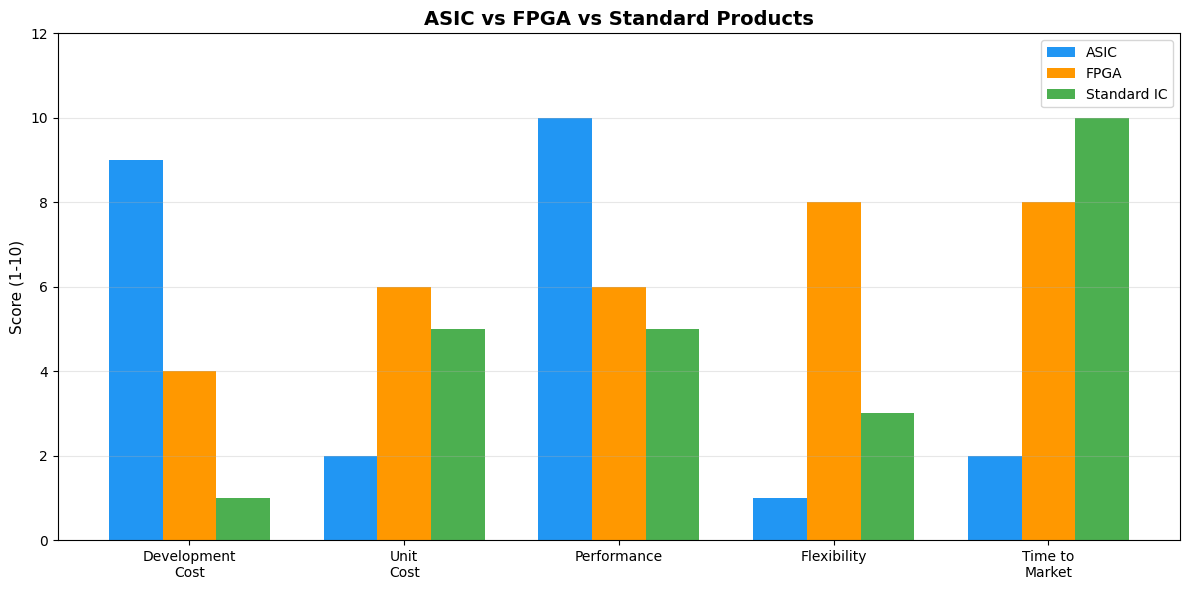

ASIC: Best for high-volume production where performance matters
FPGA: Best for prototyping and medium-volume with changing requirements
Standard: Best for quick development with standard functionality


In [3]:
# Compare ASIC vs FPGA vs Standard Products
fig, ax = plt.subplots(figsize=(12, 6))

categories = ['Development\nCost', 'Unit\nCost', 'Performance', 'Flexibility', 'Time to\nMarket']
asic = [9, 2, 10, 1, 2]
fpga = [4, 6, 6, 8, 8]
standard = [1, 5, 5, 3, 10]

x = np.arange(len(categories))
width = 0.25

bars1 = ax.bar(x - width, asic, width, label='ASIC', color=COLORS['primary'])
bars2 = ax.bar(x, fpga, width, label='FPGA', color=COLORS['secondary'])
bars3 = ax.bar(x + width, standard, width, label='Standard IC', color=COLORS['success'])

ax.set_ylabel('Score (1-10)', fontsize=11)
ax.set_title('ASIC vs FPGA vs Standard Products', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=10)
ax.legend(loc='upper right')
ax.set_ylim(0, 12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("ASIC: Best for high-volume production where performance matters")
print("FPGA: Best for prototyping and medium-volume with changing requirements")
print("Standard: Best for quick development with standard functionality")

---
<a id="4-from-transistor-to-system"></a>
# 4. From Transistor to System
---

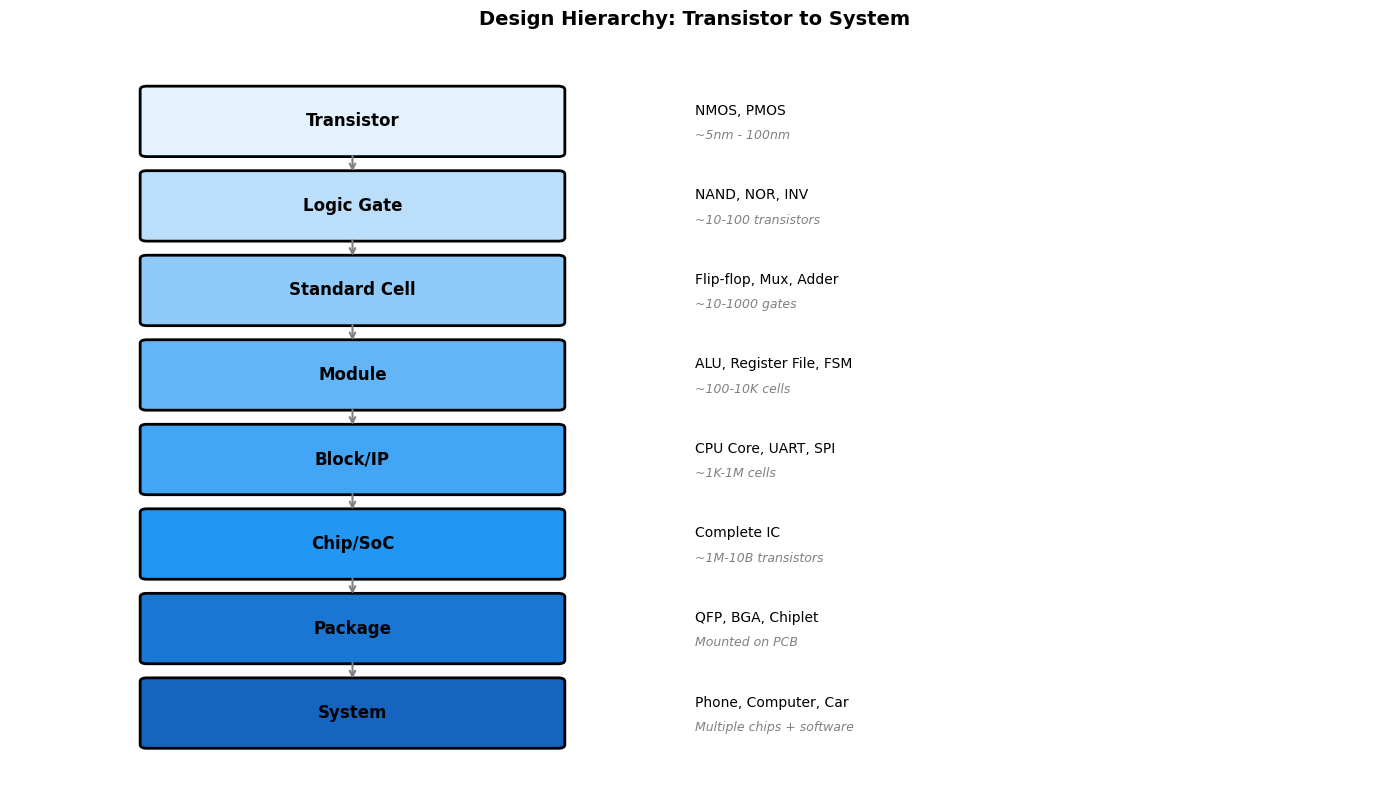

In [4]:
# Hierarchy visualization
fig, ax = plt.subplots(figsize=(14, 8))

levels = [
    ('Transistor', 'NMOS, PMOS', '~5nm - 100nm', '#E3F2FD'),
    ('Logic Gate', 'NAND, NOR, INV', '~10-100 transistors', '#BBDEFB'),
    ('Standard Cell', 'Flip-flop, Mux, Adder', '~10-1000 gates', '#90CAF9'),
    ('Module', 'ALU, Register File, FSM', '~100-10K cells', '#64B5F6'),
    ('Block/IP', 'CPU Core, UART, SPI', '~1K-1M cells', '#42A5F5'),
    ('Chip/SoC', 'Complete IC', '~1M-10B transistors', '#2196F3'),
    ('Package', 'QFP, BGA, Chiplet', 'Mounted on PCB', '#1976D2'),
    ('System', 'Phone, Computer, Car', 'Multiple chips + software', '#1565C0'),
]

for i, (name, example, scale, color) in enumerate(levels):
    y = len(levels) - i - 1
    # Main box
    rect = FancyBboxPatch((1, y * 1.2), 3, 0.9, boxstyle="round,pad=0.05",
                          facecolor=color, edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    ax.text(2.5, y * 1.2 + 0.45, name, ha='center', va='center', 
            fontsize=12, fontweight='bold')
    
    # Example
    ax.text(5, y * 1.2 + 0.6, example, ha='left', va='center', fontsize=10)
    ax.text(5, y * 1.2 + 0.25, scale, ha='left', va='center', fontsize=9, 
            style='italic', color='gray')
    
    # Arrow to next level
    if i < len(levels) - 1:
        ax.annotate('', xy=(2.5, (y-1) * 1.2 + 0.9), xytext=(2.5, y * 1.2),
                   arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

ax.set_xlim(0, 10)
ax.set_ylim(-0.5, len(levels) * 1.2 + 0.5)
ax.set_title('Design Hierarchy: Transistor to System', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

---
<a id="5-the-development-pipeline"></a>
# 5. The Development Pipeline
---

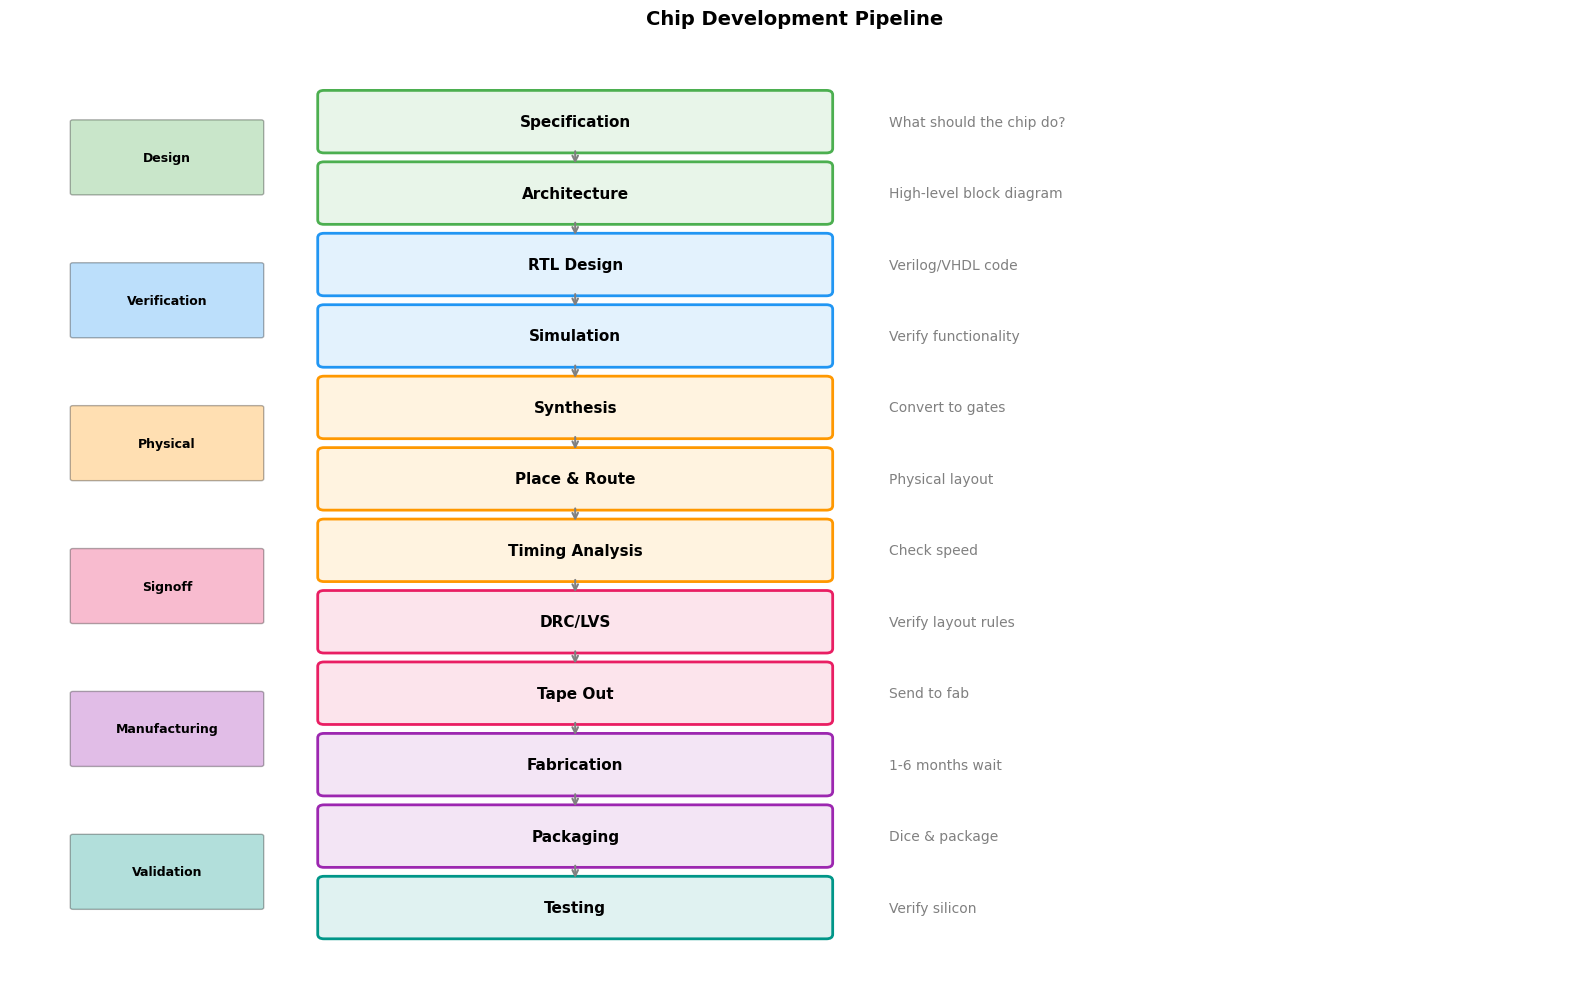

In [5]:
# Development pipeline visualization
fig, ax = plt.subplots(figsize=(16, 10))

# Define the pipeline stages
stages = [
    ('Specification', 'What should the chip do?', '#E8F5E9', 0),
    ('Architecture', 'High-level block diagram', '#E8F5E9', 0),
    ('RTL Design', 'Verilog/VHDL code', '#E3F2FD', 1),
    ('Simulation', 'Verify functionality', '#E3F2FD', 1),
    ('Synthesis', 'Convert to gates', '#FFF3E0', 2),
    ('Place & Route', 'Physical layout', '#FFF3E0', 2),
    ('Timing Analysis', 'Check speed', '#FFF3E0', 2),
    ('DRC/LVS', 'Verify layout rules', '#FCE4EC', 3),
    ('Tape Out', 'Send to fab', '#FCE4EC', 3),
    ('Fabrication', '1-6 months wait', '#F3E5F5', 4),
    ('Packaging', 'Dice & package', '#F3E5F5', 4),
    ('Testing', 'Verify silicon', '#E0F2F1', 5),
]

phase_labels = ['Design', 'Verification', 'Physical', 'Signoff', 'Manufacturing', 'Validation']
phase_colors = ['#4CAF50', '#2196F3', '#FF9800', '#E91E63', '#9C27B0', '#009688']

# Draw stages
for i, (name, desc, color, phase) in enumerate(stages):
    y = len(stages) - i - 1
    
    # Stage box
    rect = FancyBboxPatch((2, y * 0.8), 4, 0.6, boxstyle="round,pad=0.05",
                          facecolor=color, edgecolor=phase_colors[phase], linewidth=2)
    ax.add_patch(rect)
    ax.text(4, y * 0.8 + 0.3, name, ha='center', va='center', 
            fontsize=11, fontweight='bold')
    ax.text(6.5, y * 0.8 + 0.3, desc, ha='left', va='center', fontsize=10, color='gray')
    
    # Arrow
    if i < len(stages) - 1:
        ax.annotate('', xy=(4, (y-1) * 0.8 + 0.6), xytext=(4, y * 0.8),
                   arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

# Phase indicators on the left
phase_positions = [10.5, 8.5, 6.5, 4.5, 2.5, 0.5]
for i, (label, color, ypos) in enumerate(zip(phase_labels, phase_colors, phase_positions)):
    ax.add_patch(FancyBboxPatch((0, ypos * 0.8 - 0.1), 1.5, 0.8, 
                 boxstyle="round,pad=0.02", facecolor=color, alpha=0.3))
    ax.text(0.75, ypos * 0.8 + 0.3, label, ha='center', va='center', 
            fontsize=9, fontweight='bold', rotation=0)

ax.set_xlim(-0.5, 12)
ax.set_ylim(-0.5, len(stages) * 0.8 + 0.5)
ax.set_title('Chip Development Pipeline', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

### Our Course Focus

In this course, you'll experience the **full chip development flow**:

- **Analog fundamentals**: Transistors, SPICE simulation, device behavior
- **Digital design**: Verilog, synthesis, place & route, timing analysis
- **Physical design**: Layout, DRC, LVS, tapeout

Your project work will focus on the **RTL-to-GDS flow** for digital circuits:

```
Verilog Code → Simulation → Synthesis → Place & Route → GDS
```

This flow is highly automated, which lets you iterate quickly and focus on what your chip *does* rather than hand-drawing every transistor.

---
<a id="6-tools--ecosystem"></a>
# 6. Tools & Ecosystem
---

### Open Source Tools (What We Use)

| Tool | Purpose | Stage |
|------|---------|-------|
| **Icarus Verilog** | Simulation | Design |
| **Verilator** | Fast simulation + linting | Design |
| **GTKWave** | Waveform viewer | Verification |
| **Yosys** | Synthesis | Physical |
| **OpenROAD** | Place & Route | Physical |
| **Magic** | Layout editor & DRC | Signoff |
| **KLayout** | Layout viewer & DRC | Signoff |
| **Netgen** | LVS checking | Signoff |

### Commercial Tools (Industry Standard)

| Vendor | Tools |
|--------|-------|
| **Cadence** | Genus (synthesis), Innovus (P&R), Virtuoso (analog) |
| **Synopsys** | Design Compiler, IC Compiler, VCS |
| **Siemens EDA** | Questa (simulation), Calibre (DRC/LVS) |

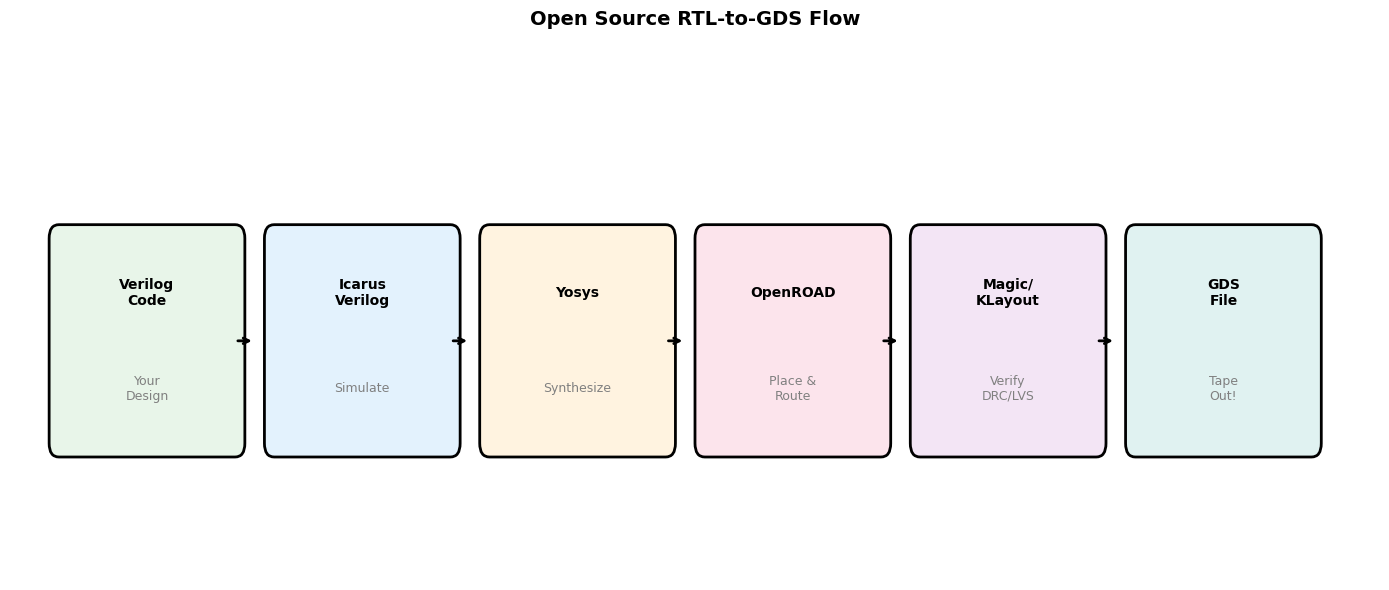

In [6]:
# Tool flow visualization
fig, ax = plt.subplots(figsize=(14, 6))

tools = [
    ('Verilog\nCode', 'Your\nDesign', '#E8F5E9'),
    ('Icarus\nVerilog', 'Simulate', '#E3F2FD'),
    ('Yosys', 'Synthesize', '#FFF3E0'),
    ('OpenROAD', 'Place &\nRoute', '#FCE4EC'),
    ('Magic/\nKLayout', 'Verify\nDRC/LVS', '#F3E5F5'),
    ('GDS\nFile', 'Tape\nOut!', '#E0F2F1'),
]

for i, (tool, action, color) in enumerate(tools):
    x = i * 2.2 + 0.5
    
    # Tool box
    rect = FancyBboxPatch((x, 1), 1.8, 1.5, boxstyle="round,pad=0.1",
                          facecolor=color, edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    ax.text(x + 0.9, 2.1, tool, ha='center', va='center', fontsize=10, fontweight='bold')
    ax.text(x + 0.9, 1.4, action, ha='center', va='center', fontsize=9, color='gray')
    
    # Arrow
    if i < len(tools) - 1:
        ax.annotate('', xy=(x + 2.0, 1.75), xytext=(x + 1.8, 1.75),
                   arrowprops=dict(arrowstyle='->', color='black', lw=2))

ax.set_xlim(0, 14)
ax.set_ylim(0, 4)
ax.set_title('Open Source RTL-to-GDS Flow', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

---
<a id="7-process-development-kits"></a>
# 7. Process Development Kits (PDKs)
---

A **PDK** tells your tools how to design for a specific manufacturing process.

### What's in a PDK?

| Component | Description |
|-----------|-------------|
| **Design Rules** | Minimum widths, spacings, enclosures |
| **Device Models** | SPICE models for transistors |
| **Standard Cells** | Pre-designed logic gates |
| **I/O Cells** | Pads for chip inputs/outputs |
| **Tech Files** | Layer definitions, colors, connectivity |

### Open PDKs We Can Use

| PDK | Node | Provider | Notes |
|-----|------|----------|-------|
| **SkyWater 130nm** | 130nm | Google/SkyWater | Most mature open PDK |
| **GlobalFoundries 180nm** | 180nm | GF/Efabless | Good for analog |
| **IHP 130nm** | 130nm | IHP | SiGe BiCMOS available |

---
<a id="8-low-cost-tapeout-options"></a>
# 8. Low-Cost Tapeout Options
---

Several programs make chip fabrication accessible to students, hobbyists, and researchers.

### Educational & Hobbyist Programs

| Program | Cost | Details |
|---------|------|---------|
| **[Tiny Tapeout](https://tinytapeout.com)** | ~$100-300 | Shared shuttle, small tiles (~160x225 um) |
| **[Efabless ChipIgnite](https://efabless.com)** | ~$10K (scholarships available) | Full chip area, SkyWater 130nm |
| **Google/Efabless MPW** | Free (competitive) | Requires open source |

These programs use multi-project wafers (MPW) to share fabrication costs across many designs.

### Research & Startup Options

| Option | Cost Range | Typical Use |
|--------|-----------|-------------|
| **MPW Shuttles** | $20K-100K | Prototype runs, small teams |
| **Dedicated Run** | $100K-10M+ | Production volumes |

### Choosing a Path

For this course, any of the educational programs work. The design flow is the same—only the area constraints and submission process differ. Check current specifications at each program's website, as shuttle schedules and requirements change.

---
<a id="9-version-control-for-hardware"></a>
# 9. Version Control for Hardware
---

### Why Version Control?

- **Track changes**: See what changed and when
- **Collaborate**: Multiple people working on same design
- **Revert mistakes**: Go back to a working version
- **Branches**: Try experimental changes safely

### Git Basics for Hardware Projects

```bash
# Initialize a new repository
git init

# Stage changes
git add mydesign.v testbench.v

# Commit with a message
git commit -m "Add UART transmitter module"

# View history
git log --oneline
```

### What to Track vs Ignore

| Track (commit these) | Ignore (.gitignore) |
|---------------------|---------------------|
| Verilog source (.v) | Simulation outputs (.vcd, .vvp) |
| Testbenches | Build artifacts |
| Constraints (.sdc) | Generated netlists |
| Documentation | Large binary files |

---
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 30px; margin: 20px -10px -10px -10px; border-radius: 15px 15px 0 0; text-align: center;">

## Summary

- Chips are **integrated circuits** built on silicon
- The **development pipeline** goes from specification to tested silicon
- We'll use **open source tools** (Yosys, OpenROAD, Magic)
- **PDKs** define how to design for a specific fab process
- **Low-cost tapeout** options make custom silicon accessible

### Homework
1. Install the course toolchain (Docker container)
2. Run a "hello world" synthesis
3. Verify your tools work before Thursday!

</div>